Signal x (shape: (16,)):
[ 0.6698433   0.108941    0.1175141   0.49648276  1.85712578  0.63531191
  0.81072843 -0.62357751 -0.64828213  0.36605676 -1.10016412 -0.36736349
 -0.4463857   1.51526493 -0.53366188  0.27328291]



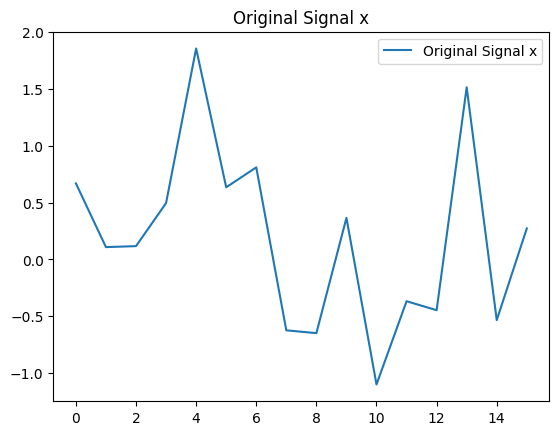

Matrix Psi (shape: (16, 16)):
[[ 1.00000000e+00 -1.38777878e-17  5.55111512e-17 -6.93889390e-18
  -2.60208521e-18 -8.67361738e-19 -8.67361738e-19  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.77555756e-17  1.00000000e+00 -5.55111512e-17  0.00000000e+00
   2.77555756e-17 -3.46944695e-18  0.00000000e+00 -8.67361738e-19
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.38777878e-17  0.00000000e+00  1.00000000e+00 -2.77555756e-17
   3.46944695e-18 -1.73472348e-18 -3.46944695e-18  0.00000000e+00
  -8.67361738e-19  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.38777878e-17 -2.77555756e-17  1.00000000e+00
  -5.55111512e-17  6.93889390e-18  0.00000000e+00 -3.46944695e-18
   0.00000000e+00 -8.67361738e-19  0.000000

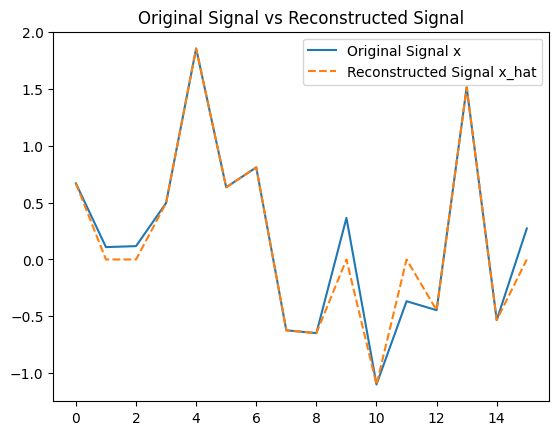

Mean Squared Error (MSE) between x and x_hat: 0.0231


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pywt import wavedec, waverec

def create_psi_matrix(n, wavelet='db4'):
    """
    Constructs the Psi matrix of size (n, n) based on the wavelet transform.
    
    Parameters:
    - n (int): The dimension of the Psi matrix (n x n).
    - wavelet (str): The type of wavelet to use for DWT. Default is 'db4'.
    
    Returns:
    - numpy.ndarray: The Psi matrix of shape (n, n).
    """
    psi = np.zeros((n, n))
    for ii in range(n):
        ek = np.zeros(n)
        ek[ii] = 1
        coeffs = wavedec(ek, wavelet, level=None)
        psi_row = waverec(coeffs, wavelet)[:n]
        psi[ii, :] = psi_row

    return psi

# Step 1: Create a random signal x
n = 16
x = np.random.randn(n)
print(f"Signal x (shape: {x.shape}):\n{x}\n")

# Step 2: Plot random signal
plt.figure()
plt.plot(x, label='Original Signal x')
plt.title("Original Signal x")
plt.legend()
plt.show()

# Step 3: Create matrix Psi which rows are wavelet functions, Psi orthonormal
Psi = create_psi_matrix(n, wavelet='db4')
print(f"Matrix Psi (shape: {Psi.shape}):\n{Psi}\n")

# Step 4: Perform s = Psi^H x to represent x in sparse domain (wavelet space)
# Note: Since Psi is orthonormal, Psi^H is the transpose of Psi.
s = np.dot(Psi, x)
print(f"Wavelet coefficients s (shape: {s.shape}):\n{s}\n")

# Step 5: Threshold s signal by magnitude to remove 30% of coefficients
threshold = np.percentile(np.abs(s), 30)
s_hat = np.where(np.abs(s) >= threshold, s, 0)
print(f"Thresholded coefficients s_hat (shape: {s_hat.shape}):\n{s_hat}\n")

# Step 6: Reconstruct x_hat by x_hat = Psi s_hat
x_hat = np.dot(Psi.T, s_hat)
print(f"Reconstructed Signal x_hat (shape: {x_hat.shape}):\n{x_hat}\n")

# Step 7: Plot x_hat over x
plt.figure()
plt.plot(x, label='Original Signal x')
plt.plot(x_hat, label='Reconstructed Signal x_hat', linestyle='--')
plt.title("Original Signal vs Reconstructed Signal")
plt.legend()
plt.show()

# Step 8: Compute and print a metric to show how good the approximation is
# Here we use Mean Squared Error (MSE) as the metric
mse = np.mean((x - x_hat)**2)
print(f"Mean Squared Error (MSE) between x and x_hat: {mse:.4f}")
